In [70]:
import pandas as pd

In [71]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [72]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [73]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data

In [74]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [75]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [76]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [77]:
import tensorflow as tf

In [78]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [79]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [80]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [81]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

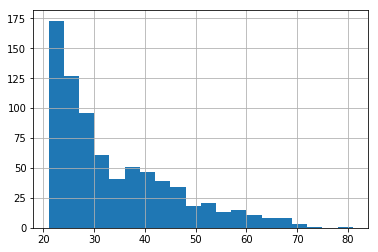

In [83]:
diabetes['Age'].hist(bins=20)

In [84]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [85]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [86]:
# TRAIN_TEST_SPLIT

In [87]:
x_data = diabetes.drop('Class',axis=1)

In [88]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [89]:
labels = diabetes['Class']

In [90]:
# labels


In [91]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=100,shuffle=True)

In [92]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\BKP\\AppData\\Local\\Temp\\tmpwdbabauz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000217B2054320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [93]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\BKP\AppData\Local\Temp\tmpwdbabauz\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 169.117
INFO:tensorflow:loss = 5.8290215, step = 101 (0.592 sec)
INFO:tensorflow:global_step/sec: 301.104
INFO:tensorflow:loss = 4.8278475, step = 201 (0.332 sec)
INFO:tensorflow:global_step/sec: 274.705
INFO:tensorflow:loss = 6.517897, step = 301 (0.371 sec)
INFO:tensorflow:global_step/sec: 286.48
INFO:tensorflow:loss = 8.356583, step = 401 (0.342 sec)
INFO:tensorflow:global_step/sec: 268.813
INFO:tensorflow:loss = 4.7270093, step = 501 (0.372 sec)
INFO:tensorflow:global_step/sec: 212.882
INFO:tensorflow:loss = 7.048369, step = 601 (0.474 sec)
INFO:tensorflow:global_step/sec: 22

In [94]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [95]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-15T03:38:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\BKP\AppData\Local\Temp\tmpwdbabauz\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-15-03:38:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.8022634, auc_precision_recall = 0.6440834, average_loss = 0.52566504, global_step = 1000, label/mean = 0.35064936, loss = 5.059526, precision = 0.6515151, prediction/mean = 0.36207873, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\BKP\AppData\Local\Temp\tmpwdbabauz\model.ckpt-1000


In [96]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8022634,
 'auc_precision_recall': 0.6440834,
 'average_loss': 0.52566504,
 'label/mean': 0.35064936,
 'loss': 5.059526,
 'precision': 0.6515151,
 'prediction/mean': 0.36207873,
 'recall': 0.5308642,
 'global_step': 1000}

In [97]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [98]:
predictions = model.predict(pred_input_func)

In [99]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\BKP\AppData\Local\Temp\tmpwdbabauz\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [100]:
my_pred

[{'logits': array([0.04891133], dtype=float32),
  'logistic': array([0.5122254], dtype=float32),
  'probabilities': array([0.4877746, 0.5122254], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.554129], dtype=float32),
  'logistic': array([0.63509303], dtype=float32),
  'probabilities': array([0.36490697, 0.635093  ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.6876225], dtype=float32),
  'logistic': array([0.33456218], dtype=float32),
  'probabilities': array([0.6654379, 0.3345622], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.669653], dtype=float32),
  'logistic': array([0.33857453], dtype=float32),
  'probabilities': array([0.6614255 , 0.33857456], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': arra

In [101]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\BKP\\AppData\\Local\\Temp\\tmpvyxce1ox', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000217AFC02470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [102]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [104]:
embedded_group_col=tf.feature_column.embedding_column(assigned_group,dimension=4)

In [106]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [107]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [108]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\BKP\\AppData\\Local\\Temp\\tmpglt_oiji', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000217B0A924E0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [109]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\BKP\AppData\Local\Temp\tmpglt_oiji\model.ckpt.
INFO:tensorflow:loss = 7.114393, step = 1
INFO:tensorflow:global_step/sec: 175.796
INFO:tensorflow:loss = 5.638229, step = 101 (0.574 sec)
INFO:tensorflow:global_step/sec: 289.359
INFO:tensorflow:loss = 5.481453, step = 201 (0.342 sec)
INFO:tensorflow:global_step/sec: 257.265
INFO:tensorflow:loss = 4.479865, step = 301 (0.391 sec)
INFO:tensorflow:global_step/sec: 216.316
INFO:tensorflow:loss = 7.4986835, step = 401 (0.463 sec)
INFO:tensorflow:global_step/sec: 271.73
INFO:tensorflow:lo

In [110]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [111]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-15T03:46:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\BKP\AppData\Local\Temp\tmpglt_oiji\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-15-03:46:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.82839507, auc_precision_recall = 0.72314477, average_loss = 0.48737666, global_step = 1000, label/mean = 0.35064936, loss = 4.6910005, precision = 0.64285713, prediction/mean = 0.3503491, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\BKP\AppData\Local\Temp\tmpglt_oiji\model.ckpt-1000


{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82839507,
 'auc_precision_recall': 0.72314477,
 'average_loss': 0.48737666,
 'label/mean': 0.35064936,
 'loss': 4.6910005,
 'precision': 0.64285713,
 'prediction/mean': 0.3503491,
 'recall': 0.5555556,
 'global_step': 1000}